Loaded 10000 transactions

=== Basic Dataset Information ===

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     10000 non-null  int64         
 1   amount             10000 non-null  float64       
 2   timestamp          10000 non-null  datetime64[ns]
 3   merchant_category  10000 non-null  object        
 4   merchant_country   10000 non-null  object        
 5   card_type          10000 non-null  object        
 6   transaction_type   10000 non-null  object        
 7   is_fraudulent      10000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 625.1+ KB
None

Basic Statistics:
       transaction_id        amount                      timestamp  \
count     10000.00000  10000.000000                          10000   
mean       5000.5000

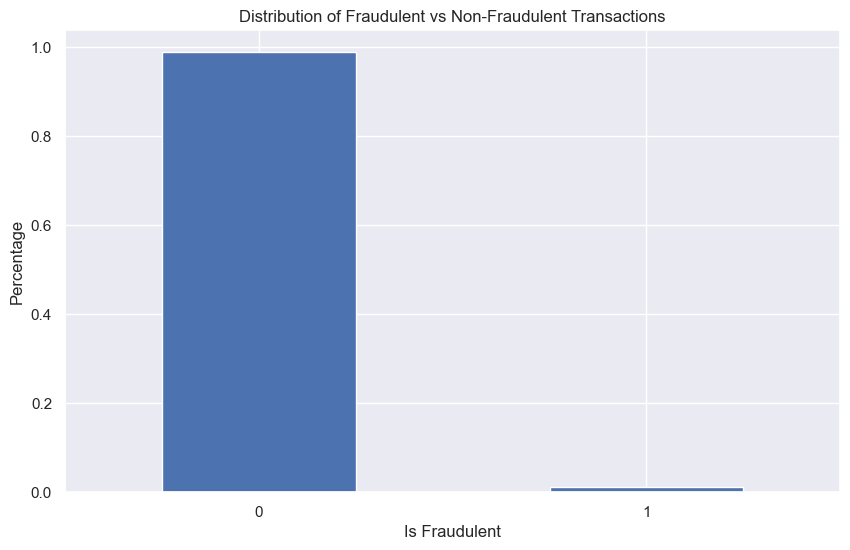


Fraud Distribution:
is_fraudulent
0    0.9892
1    0.0108
Name: proportion, dtype: float64

Overall Fraud Rate: 1.08%

=== Transaction Amount Analysis ===


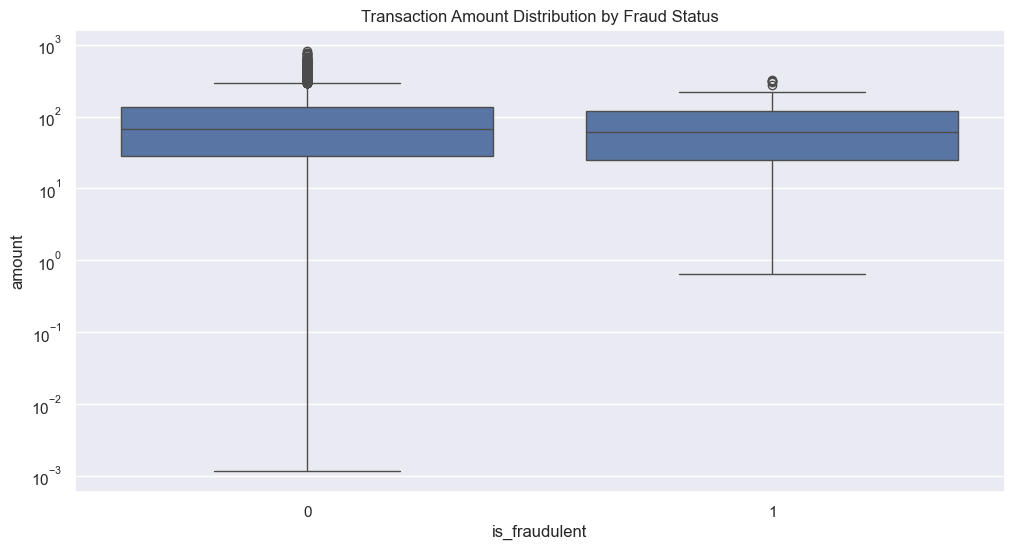


Amount Statistics by Fraud Status:
                count       mean        std       min        25%        50%  \
is_fraudulent                                                                 
0              9892.0  97.906953  97.630470  0.001163  28.323607  67.885079   
1               108.0  83.364611  77.111113  0.648534  24.852681  61.343531   

                      75%         max  
is_fraudulent                          
0              134.973042  817.244560  
1              118.813932  325.841562  


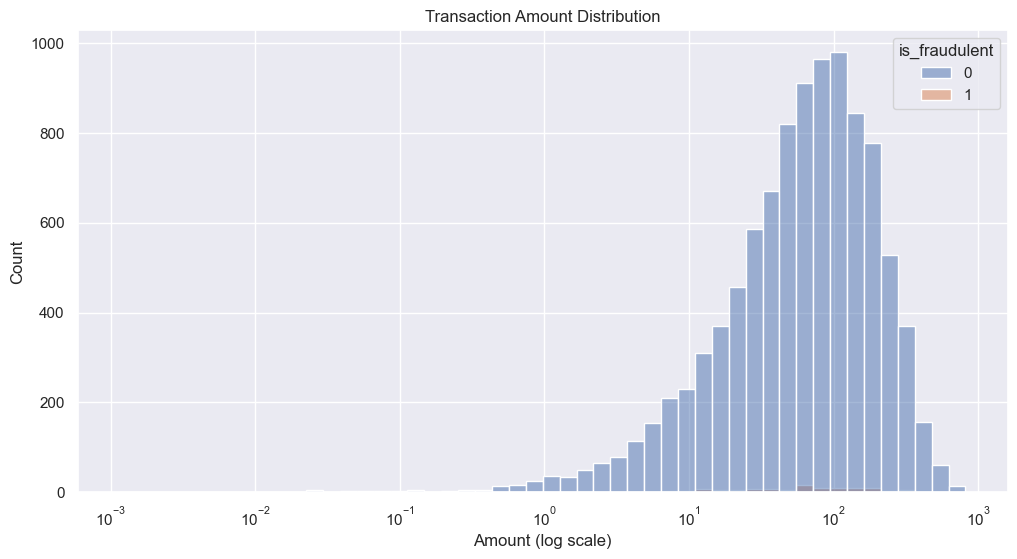


=== Temporal Pattern Analysis ===


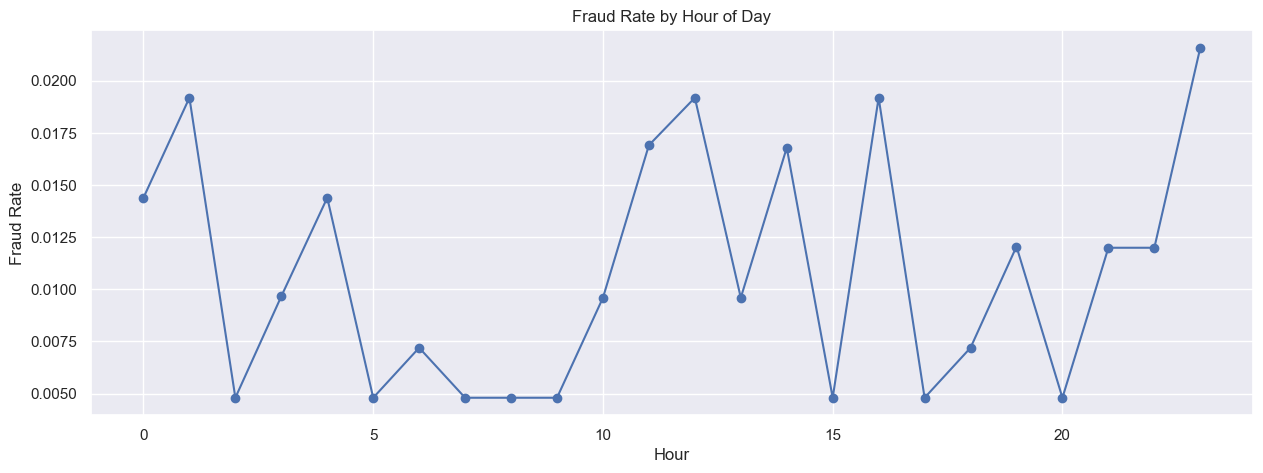

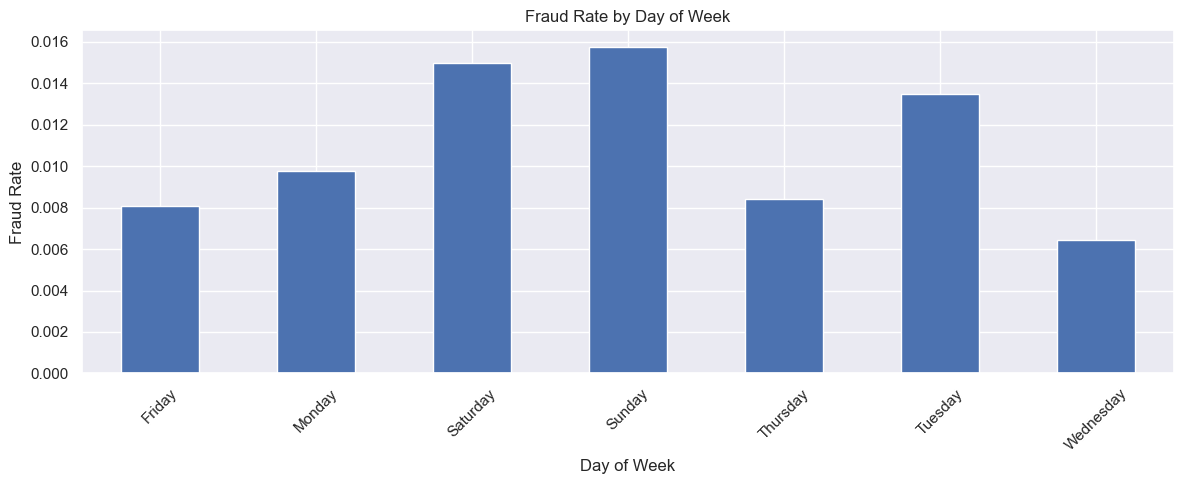


=== Categorical Feature Analysis ===

Analyzing merchant_category:

Value Counts:
merchant_category
restaurant       2088
retail           2024
entertainment    2007
other            1941
travel           1940
Name: count, dtype: int64


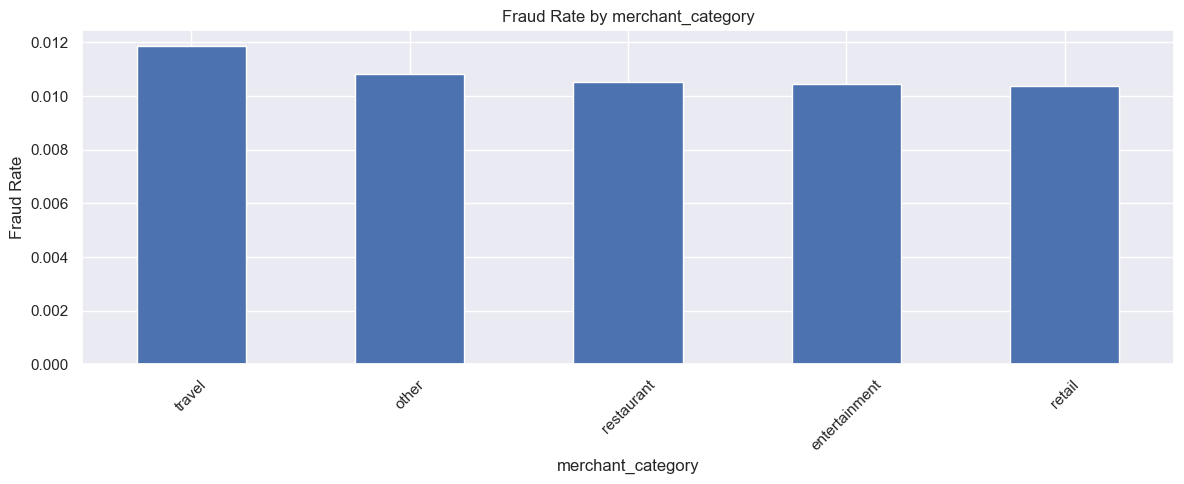


Top 5 merchant_category by Fraud Rate:
merchant_category
travel           0.011856
other            0.010819
restaurant       0.010536
entertainment    0.010463
retail           0.010375
Name: is_fraudulent, dtype: float64

Analyzing merchant_country:

Value Counts:
merchant_country
JP    1569
DE    1478
BR    1446
FR    1414
US    1386
Name: count, dtype: int64


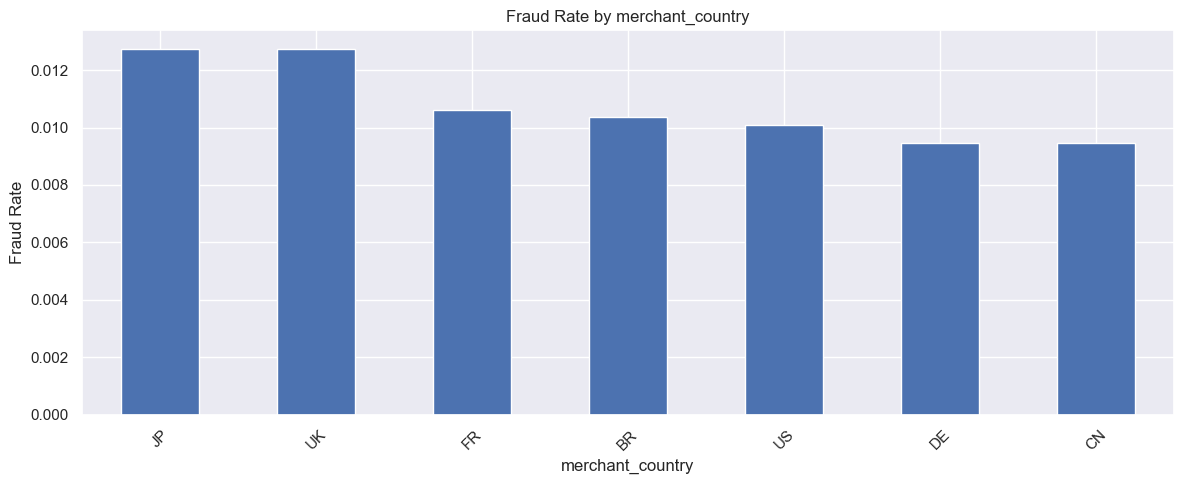


Top 5 merchant_country by Fraud Rate:
merchant_country
JP    0.012747
UK    0.012744
FR    0.010608
BR    0.010373
US    0.010101
Name: is_fraudulent, dtype: float64

Analyzing card_type:

Value Counts:
card_type
virtual    3373
debit      3342
credit     3285
Name: count, dtype: int64


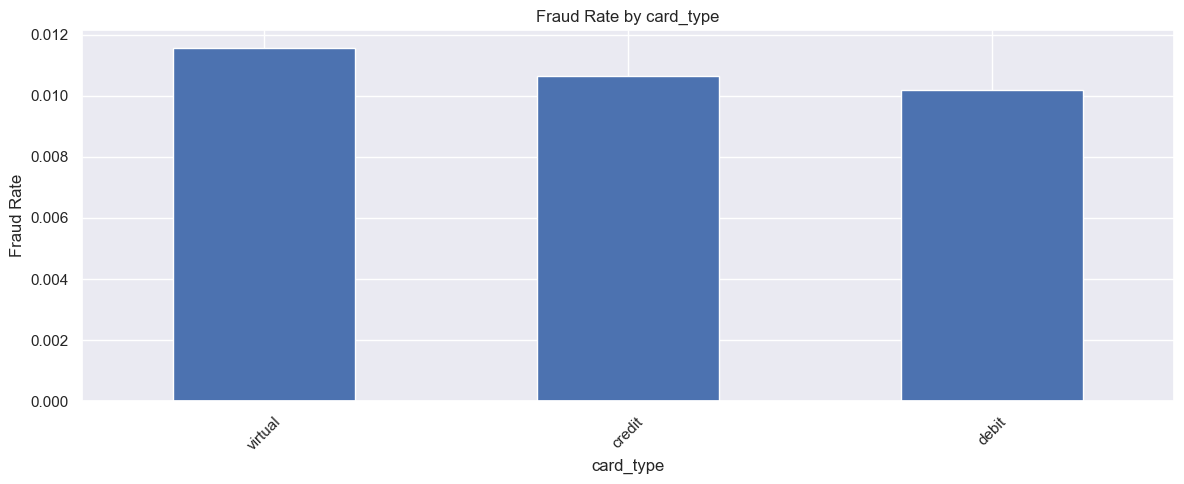


Top 5 card_type by Fraud Rate:
card_type
virtual    0.011562
credit     0.010654
debit      0.010174
Name: is_fraudulent, dtype: float64

Analyzing transaction_type:

Value Counts:
transaction_type
in-store    3441
mobile      3323
online      3236
Name: count, dtype: int64


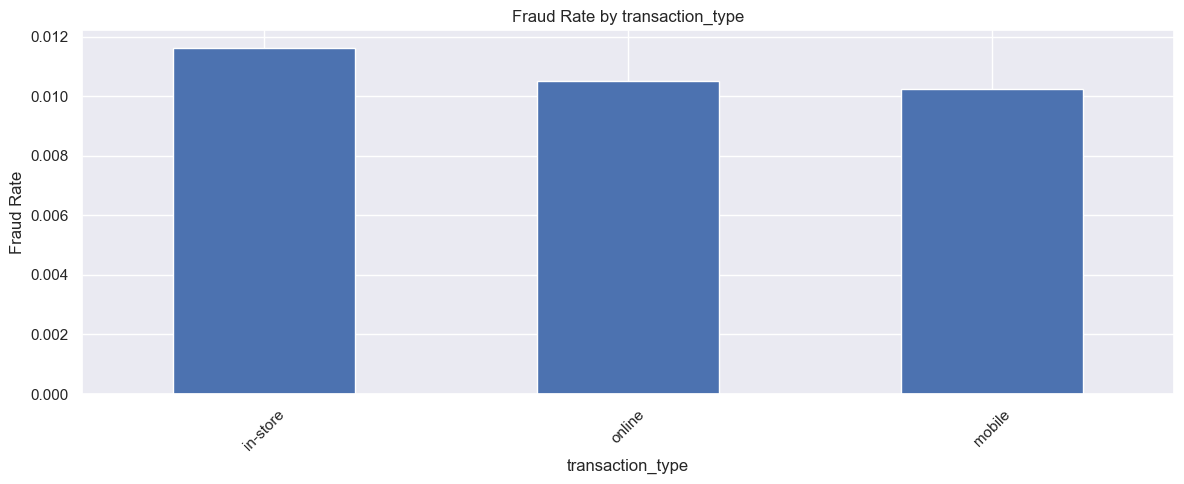


Top 5 transaction_type by Fraud Rate:
transaction_type
in-store    0.011625
online      0.010507
mobile      0.010232
Name: is_fraudulent, dtype: float64

=== Feature Correlation Analysis ===


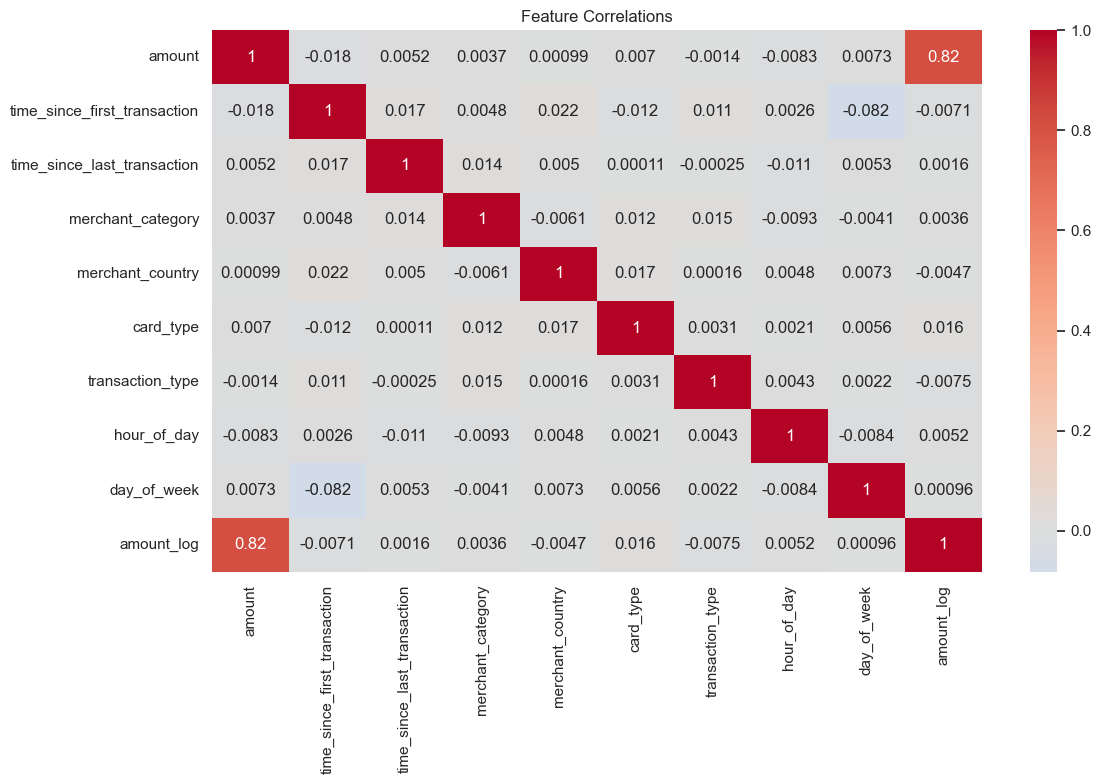


Analysis report saved to: reports/eda_report_20250131_193133.txt


In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import os
from datetime import datetime

# Add project root to Python path
notebook_dir = Path().resolve()
project_root = notebook_dir.parent
sys.path.insert(0, str(project_root))

# Import our custom modules
from src.data_processing.etl.extract import TransactionExtractor
from src.data_processing.etl.transform import TransactionTransformer

# Set plotting style
plt.style.use('default')  # Use default style instead of seaborn
sns.set_theme()  # This will set the seaborn theme

def load_sample_data():
    """Load sample transaction data"""
    extractor = TransactionExtractor()
    df = extractor.extract_sample_transactions(sample_size=10000)
    print(f"Loaded {len(df)} transactions")
    return df

def analyze_basic_stats(df):
    """Display basic statistics about the dataset"""
    print("\n=== Basic Dataset Information ===")
    print("\nDataset Info:")
    print(df.info())
    
    print("\nBasic Statistics:")
    print(df.describe())
    
    print("\nMissing Values:")
    missing = df.isnull().sum()
    print(missing[missing > 0])

def analyze_fraud_distribution(df):
    """Analyze and plot fraud distribution"""
    print("\n=== Fraud Distribution Analysis ===")
    
    fraud_dist = df['is_fraudulent'].value_counts(normalize=True)
    
    plt.figure(figsize=(10, 6))
    fraud_dist.plot(kind='bar')
    plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
    plt.xlabel('Is Fraudulent')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.show()
    
    print("\nFraud Distribution:")
    print(fraud_dist)
    
    # Calculate fraud rate
    fraud_rate = (df['is_fraudulent'] == 1).mean() * 100
    print(f"\nOverall Fraud Rate: {fraud_rate:.2f}%")

def analyze_amounts(df):
    """Analyze transaction amounts"""
    print("\n=== Transaction Amount Analysis ===")
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='is_fraudulent', y='amount', data=df)
    plt.title('Transaction Amount Distribution by Fraud Status')
    plt.yscale('log')
    plt.show()
    
    print("\nAmount Statistics by Fraud Status:")
    print(df.groupby('is_fraudulent')['amount'].describe())
    
    # Additional amount analysis
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='amount', hue='is_fraudulent', bins=50, log_scale=True)
    plt.title('Transaction Amount Distribution')
    plt.xlabel('Amount (log scale)')
    plt.ylabel('Count')
    plt.show()

def analyze_temporal_patterns(df):
    """Analyze temporal patterns in transactions"""
    print("\n=== Temporal Pattern Analysis ===")
    
    # Convert timestamp to datetime if it's not already
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # Extract time components
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.day_name()
    df['month'] = df['timestamp'].dt.month
    
    # Fraud rate by hour
    plt.figure(figsize=(15, 5))
    hourly_fraud = df.groupby('hour')['is_fraudulent'].mean()
    hourly_fraud.plot(kind='line', marker='o')
    plt.title('Fraud Rate by Hour of Day')
    plt.xlabel('Hour')
    plt.ylabel('Fraud Rate')
    plt.grid(True)
    plt.show()
    
    # Fraud rate by day of week
    plt.figure(figsize=(12, 5))
    daily_fraud = df.groupby('day_of_week')['is_fraudulent'].mean()
    daily_fraud.plot(kind='bar')
    plt.title('Fraud Rate by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Fraud Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def analyze_categorical_features(df):
    """Analyze categorical features"""
    print("\n=== Categorical Feature Analysis ===")
    
    categorical_columns = [
        'merchant_category',
        'merchant_country',
        'card_type',
        'transaction_type'
    ]
    
    for column in categorical_columns:
        print(f"\nAnalyzing {column}:")
        
        # Value counts
        print("\nValue Counts:")
        print(df[column].value_counts().head())
        
        # Fraud rate by category
        fraud_rate = df.groupby(column)['is_fraudulent'].mean().sort_values(ascending=False)
        
        plt.figure(figsize=(12, 5))
        fraud_rate.plot(kind='bar')
        plt.title(f'Fraud Rate by {column}')
        plt.xlabel(column)
        plt.ylabel('Fraud Rate')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        print(f"\nTop 5 {column} by Fraud Rate:")
        print(fraud_rate.head())

def analyze_correlations(df):
    """Analyze feature correlations"""
    print("\n=== Feature Correlation Analysis ===")
    
    # Transform categorical variables
    transformer = TransactionTransformer()
    df_transformed = transformer.fit_transform(df, save_local=False)
    
    # Calculate correlations
    corr_matrix = df_transformed.corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlations')
    plt.tight_layout()
    plt.show()

def save_analysis_results(df):
    """Save analysis results to a report file"""
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    report_file = Path("reports") / f"eda_report_{timestamp}.txt"
    report_file.parent.mkdir(exist_ok=True)
    
    with open(report_file, 'w') as f:
        f.write("=== Fraud Detection EDA Report ===\n\n")
        
        # Basic stats
        f.write("Dataset Shape: {}\n".format(df.shape))
        f.write("\nFraud Rate: {:.2f}%\n".format(df['is_fraudulent'].mean() * 100))
        
        # Amount statistics
        f.write("\nAmount Statistics:\n")
        f.write(df['amount'].describe().to_string())
        
        # Categorical feature statistics
        for col in ['merchant_category', 'merchant_country', 'card_type', 'transaction_type']:
            f.write(f"\n\nTop 5 {col}:\n")
            f.write(df[col].value_counts().head().to_string())
    
    print(f"\nAnalysis report saved to: {report_file}")

def main():
    # Load data
    df = load_sample_data()
    
    # Run analyses
    analyze_basic_stats(df)
    analyze_fraud_distribution(df)
    analyze_amounts(df)
    analyze_temporal_patterns(df)
    analyze_categorical_features(df)
    analyze_correlations(df)
    
    # Save results
    save_analysis_results(df)

if __name__ == "__main__":
    main() 